In [1]:
import pandas as pd

df = pd.read_csv('data_transform.csv')


In [2]:
df.head()

,Price,Sales
0,2.20,68.9
1,7.48,15.6
2,7.26,19.5
3,3.08,35.1
4,8.14,10.4


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     53.34
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           2.52e-09
Time:                        11:37:03   Log-Likelihood:                -232.84
No. Observations:                  50   AIC:                             469.7
Df Residuals:                      48   BIC:                             473.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.9905      9.372     11.095      0.0

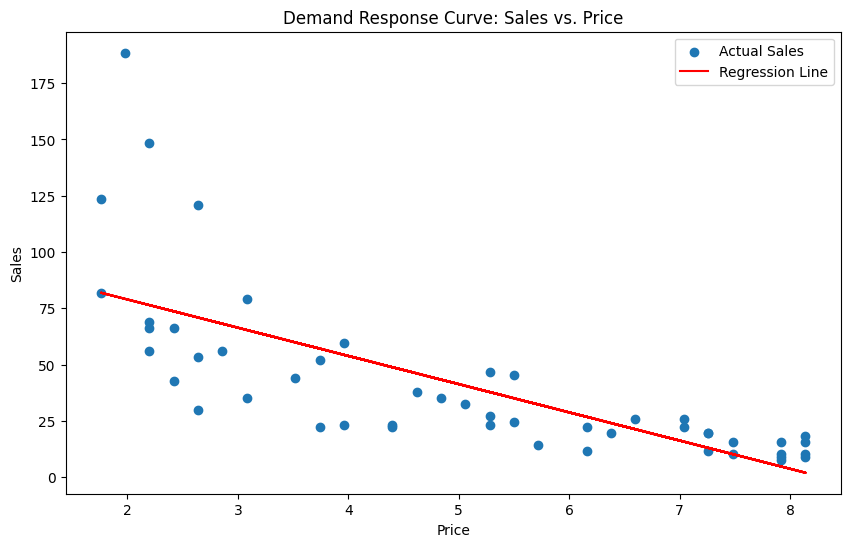

In [5]:
# prompt: analyze the sales at retail outlets for different prices (using the concept of Demand Response Curve). Fit a Simple Linear regression model to this dataset directly and answer questions (1) to (4).
# Hint: smf.ols from statsmodels.formula.api

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Fit the simple linear regression model
model = smf.ols('Sales ~ Price', data=df).fit()

# Print the model summary
print(model.summary())

# Plot the regression line against the actual data points.
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Sales'], label='Actual Sales')
plt.plot(df['Price'], model.predict(), color='red', label='Regression Line')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Demand Response Curve: Sales vs. Price')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:              log_Sales   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     152.0
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.74e-16
Time:                        11:40:15   Log-Likelihood:                -22.079
No. Observations:                  50   AIC:                             48.16
Df Residuals:                      48   BIC:                             51.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4848      0.177     30.923      0.0

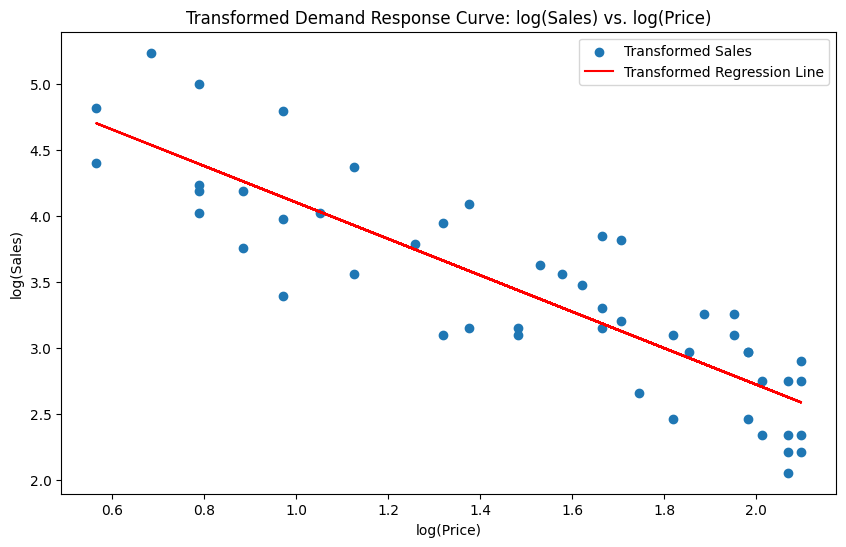

In [6]:
# prompt: Use natural log transformation and refit the model using the transformed dataset
# Hint: Use np.log

import numpy as np

# Apply natural log transformation to 'Sales' and 'Price'
df['log_Sales'] = np.log(df['Sales'])
df['log_Price'] = np.log(df['Price'])

# Fit the transformed model
transformed_model = smf.ols('log_Sales ~ log_Price', data=df).fit()

# Print the transformed model summary
print(transformed_model.summary())

# Plot the transformed regression line against the transformed data points.
plt.figure(figsize=(10, 6))
plt.scatter(df['log_Price'], df['log_Sales'], label='Transformed Sales')
plt.plot(df['log_Price'], transformed_model.predict(), color='red', label='Transformed Regression Line')
plt.xlabel('log(Price)')
plt.ylabel('log(Sales)')
plt.title('Transformed Demand Response Curve: log(Sales) vs. log(Price)')
plt.legend()
plt.show()

In [7]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [8]:
X.head()

,Safety Features,Tech Features,Marketing Spend,Premium Hatchback,SUV
0,175349.20,116897.80,491784.10,0,1
1,172597.70,131377.59,463898.53,0,0
2,163441.51,81145.55,427934.54,1,0
3,154372.41,98671.85,403199.62,0,1
4,152107.34,71391.77,386168.42,1,0


In [9]:
y.head()

,Profit
0,227261.83
1,226792.06
2,226050.39
3,217901.99
4,201187.94


In [10]:
# prompt: train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# prompt: use LinearRegression from sklearn.linear_model and build the regression model

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model (example: using R-squared)
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

R-squared: 0.9347068473282425


In [12]:
model.coef_

array([[ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02,
        -9.59284160e+02,  6.99369053e+02]])

In [13]:
model.intercept_

array([69744.98712385])

In [15]:
model.predict([[1315.46, 115816.21, 297114.46, 1, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[84489.1056363]])